<a href="https://colab.research.google.com/github/odevhesabi1/Odevler/blob/main/A_07_FeatureEngineeringPart1_tr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu ödevde de [Öğrencilerin Sınav Performansı](https://www.kaggle.com/spscientist/students-performance-in-exams/home)'na  ait verileri kullanacaksınız. 

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.


1. Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz? 

2. Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin. 

3. Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("StudentsPerformance.csv")

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
df1= df.copy()
df1["new_score_feature"] =(df["math score"] + df["reading score"] + df["writing score"]) / 3
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,norm math score,norm reading score,norm writing score,winsorize_math_score,winsorize_reading_score,winsorize_writing_score,norm_winsorize_math_score,norm_winsorize_reading_score,norm_winsorize_writing_score,new_score_feature
0,female,group B,bachelor's degree,standard,none,72,72,74,0.03358,0.03221,0.03356,72,72,74,0.03357,0.03220,0.03354,72.66667
1,female,group C,some college,standard,completed,69,90,88,0.03218,0.04026,0.03991,69,90,88,0.03217,0.04025,0.03989,82.33333
2,female,group B,master's degree,standard,none,90,95,93,0.04197,0.04250,0.04218,90,95,93,0.04196,0.04248,0.04216,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.02192,0.02550,0.01995,47,57,44,0.02191,0.02549,0.01995,49.33333
4,male,group C,some college,standard,none,76,78,75,0.03545,0.03489,0.03401,76,78,75,0.03543,0.03488,0.03400,76.33333


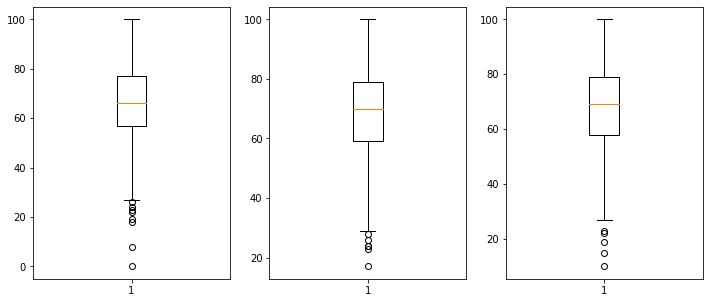

In [3]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.boxplot(df["math score"])
plt.subplot(1,3,2)
plt.boxplot(df["reading score"])
plt.subplot(1,3,3)
plt.boxplot(df["writing score"])

plt.show()


In [4]:
from scipy.stats import zscore
columns = ["math score","reading score", "writing score"]
df_aykiri = pd.DataFrame()

for column in columns:
  for threshold in range(1,5):
    z_scores = zscore(df[column])
    aykiri_deger_sayisi = len((np.where(z_scores > threshold)[0]))
    df_aykiri = df_aykiri.append({"feature": column, "aykiri değer sayısı" : aykiri_deger_sayisi, "eşik değeri" : threshold}, ignore_index=True)

df_aykiri

##Sonuca göre, aykiri değer sayısının fazla olup olmadığına karar veremedim. Benim yorumum veride aykırı değer yok. Threshold = 2 için her feature'da 18-20 tane
#aykiri değer görünsede, bana en azından bu veriseti için aykırı değer gibi gelmedi. O yüzden aykiri değer düzeltmesi yapmadan cevaplara
#devam ediyorum.

,aykiri değer sayısı,eşik değeri,feature
0,154.0,1.0,math score
1,19.0,2.0,math score
2,0.0,3.0,math score
3,0.0,4.0,math score
4,176.0,1.0,reading score
5,20.0,2.0,reading score
6,0.0,3.0,reading score
7,0.0,4.0,reading score
8,151.0,1.0,writing score
9,18.0,2.0,writing score


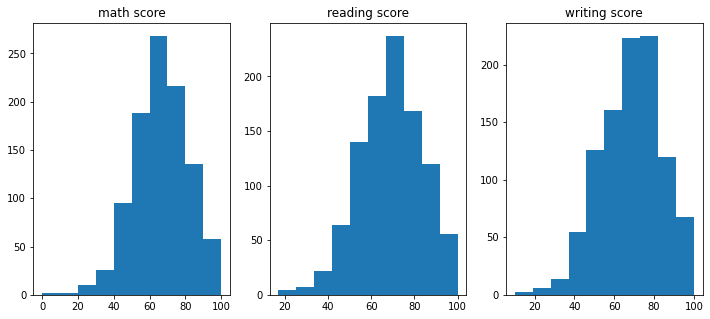

In [5]:
## Verilerin normal dağılımlı olup olmadığının incelemek için hist ile verilerin dağılım grafiğini kontrol ediyorum.
# Sonuca göre veriler tam olarak normal dağılıma sahip görünmese de sağda ve solda kuyruklar oluşmuş, yine de bir ortada
#kümelenme trendi görüyorum.



plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.hist(df["math score"])
plt.title("math score")

plt.subplot(1,3,2)
plt.hist(df["reading score"])
plt.title("reading score")

plt.subplot(1,3,3)
plt.hist(df["writing score"])
plt.title("writing score")

plt.show()



In [6]:
## Verilerin normal dağılıp dağılmadığını istatistiksel olarak inceleyelim.

from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(df[ozellik]))
    norm_stats = normaltest(np.log(df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

## Math score için neden istatistiksel değerleri vermediğini anlamadım. Ancak 3 feature'ın da dağılımları hemen hemen birbirine benzediğinden 
# math score istatistiklerinin de benzer olduğunu düşünüp hareket ediyorum. 


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1687: RuntimeWarning: invalid value encountered in subtract
  diffx = x - mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,nan,nan,nan,nan
1,reading score,495.12732,0.00000,209.77151,0.00000
2,writing score,1410.93701,0.00000,318.96921,0.00000


In [7]:
# Cevap 1 - : Verileri normal hale getirmek için normalize etmeyi tercih ediyorum.


from sklearn.preprocessing import normalize

df["norm math score"] = normalize(np.array(df["math score"]).reshape(1,-1)).reshape(-1,1)
df["norm reading score"] = normalize(np.array(df["reading score"]).reshape(1,-1)).reshape(-1,1)
df["norm writing score"] = normalize(np.array(df["writing score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["math score", "norm math score", "reading score", "norm reading score", "writing score", "norm writing score"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

## Sadece matematik dersinde minimum skor olarak 0 var. Diğer derslerde minmum skorlar 0 değil. Yukarıda matematik skoru için
#jarquera bera istatistiklerinin nan dönmesinin sebebi minimum skorun 0 olması olabilir.

# Bunun için daha gerek olmadığını düşündüğüm winsorize'ı, bir sonraki satırda uygulayıp tekrar jarquera stats sonuçlarını görüp normalize
#etmeyi deneyeceğim.

Minimum Değer
-----------------
math score            0.00000
norm math score       0.00000
reading score        17.00000
norm reading score    0.00760
writing score        10.00000
norm writing score    0.00454
dtype: float64

Maksimum Değer
-----------------
math score           100.00000
norm math score        0.04664
reading score        100.00000
norm reading score     0.04473
writing score        100.00000
norm writing score     0.04535
dtype: float64


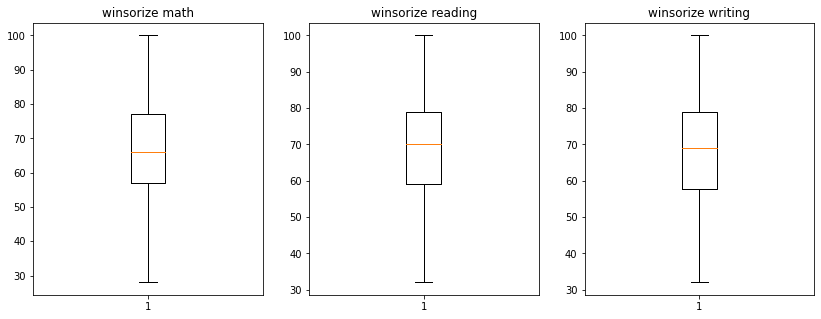

In [8]:
from scipy.stats.mstats import winsorize

winsorize_math_score = winsorize(df["math score"], (0.01, 0))
df["winsorize_math_score"] = winsorize_math_score

winsorize_reading_score = winsorize(df["reading score"], (0.01, 0))
df["winsorize_reading_score"] = winsorize_reading_score

winsorize_writing_score = winsorize(df["writing score"], (0.01, 0))
df["winsorize_writing_score"] = winsorize_writing_score

plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.boxplot(df["winsorize_math_score"])
plt.title("winsorize math")

plt.subplot(1,3,2)
plt.boxplot(df["winsorize_reading_score"])
plt.title("winsorize reading")

plt.subplot(1,3,3)
plt.boxplot(df["winsorize_writing_score"])
plt.title("winsorize writing")
plt.show()

In [9]:

from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["winsorize_math_score", "winsorize_reading_score", "winsorize_writing_score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(df[ozellik]))
    norm_stats = normaltest(np.log(df[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri


#Jarqu bera istatistiklerinin tam olarak ne anlama geldiğini yorumlayamıyorum, buraya da bakabilir miyiz.

#Aykırı değerleri temizleyince matematik skoru için jarqure istatistik sonuçlarını görebildik. O yüzden 31. satırda aykırı değerleri
#temizlememek ile yaptığım yorumlar yanlış cıktı sanırım. Bu bundan sonra nasıl bir veri seti ile çalışırsam çalışayım, aykırı değer
#değer sayısı az görünse bile mutlaka aykırı
#değer temizleme yöntemlerini ( mesela winsorize, hem uygulaması kolay) uygulamam gerektiği sonucunu cıkarıyorum.

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,winsorize_math_score,163.67135,0.00000,116.11837,0.00000
1,winsorize_reading_score,125.13478,0.00000,96.63811,0.00000
2,winsorize_writing_score,101.38106,0.00000,82.58149,0.00000


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

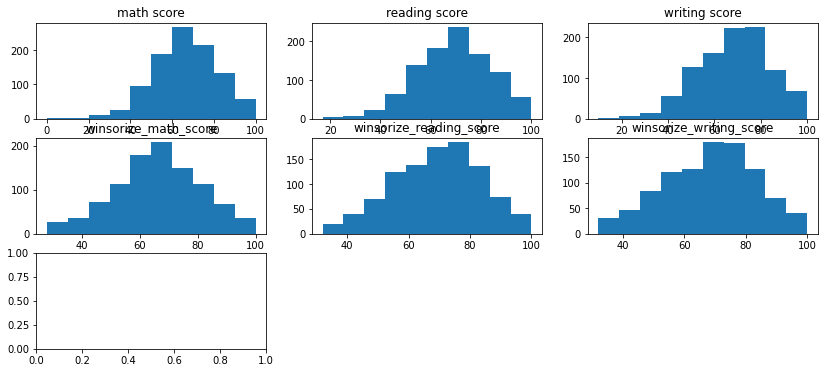

In [28]:
## Aykırı değerleri de temizledikten sonra, logaritma dönüşümü yapıp dağılımların grafiğini karsılastırıyoruz.

degiskenler = ["math score", "reading score", "writing score"]
winsorize_degiskenler = ["winsorize_math_score", "winsorize_reading_score", "winsorize_writing_score"]

plt.figure(figsize=(14,6))

for i in range(3):
  plt.subplot(3,3,i+1)
  plt.hist(df[degiskenler[i]])
  plt.title(degiskenler[i])

for i in range(3):
  plt.subplot(3,3,i+4)
  plt.hist(df[winsorize_degiskenler[i]])
  plt.title(winsorize_degiskenler[i])


for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(df[degiskenler[i]]))
    plt.title(degiskenler[i] + ' (log dönüşümlü)')

## Logaritma dönüşümü yapmadı, anladığım kadarıyla önce değerleri 0-1 aralığına getirmemiz lazım. Aşağıdaki satırda feature'ları normalize ediyoruz.


In [31]:

from sklearn.preprocessing import normalize

df["norm_winsorize_math_score"] = normalize(np.array(df["winsorize_math_score"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorize_reading_score"] = normalize(np.array(df["winsorize_reading_score"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorize_writing_score"] = normalize(np.array(df["winsorize_writing_score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["winsorize_math_score","norm_winsorize_math_score","winsorize_reading_score","norm_winsorize_reading_score",
                    "winsorize_writing_score","norm_winsorize_writing_score"]

print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())



Minimum Değer
-----------------
winsorize_math_score           28.00000
norm_winsorize_math_score       0.01305
winsorize_reading_score        32.00000
norm_winsorize_reading_score    0.01431
winsorize_writing_score        32.00000
norm_winsorize_writing_score    0.01451
dtype: float64

Maksimum Değer
-----------------
winsorize_math_score           100.00000
norm_winsorize_math_score        0.04662
winsorize_reading_score        100.00000
norm_winsorize_reading_score     0.04472
winsorize_writing_score        100.00000
norm_winsorize_writing_score     0.04533
dtype: float64


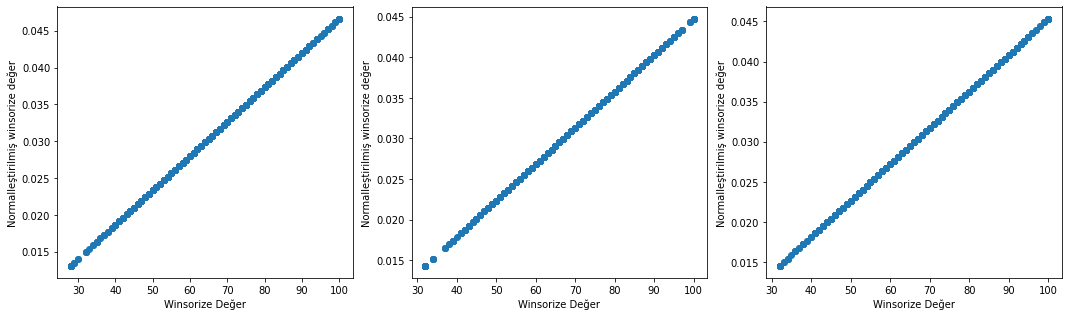

In [38]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(df[normal_ozellikler[2*i]], df[normal_ozellikler[2*i+1]])
    #plt.title("Orjinal ve Normalize değerler \n ({})".format(df[2*i])) hata verdiği için koddan cıkardım.
    plt.xlabel("Winsorize Değer")
    plt.ylabel("Normalleştirilmiş winsorize değer")

plt.show()

In [41]:
df["new_score_feature"] =(df["math score"] + df["reading score"] + df["writing score"]) / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,norm math score,norm reading score,norm writing score,winsorize_math_score,winsorize_reading_score,winsorize_writing_score,norm_winsorize_math_score,norm_winsorize_reading_score,norm_winsorize_writing_score,new_score_feature
0,female,group B,bachelor's degree,standard,none,72,72,74,0.03358,0.03221,0.03356,72,72,74,0.03357,0.03220,0.03354,72.66667
1,female,group C,some college,standard,completed,69,90,88,0.03218,0.04026,0.03991,69,90,88,0.03217,0.04025,0.03989,82.33333
2,female,group B,master's degree,standard,none,90,95,93,0.04197,0.04250,0.04218,90,95,93,0.04196,0.04248,0.04216,92.66667
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.02192,0.02550,0.01995,47,57,44,0.02191,0.02549,0.01995,49.33333
4,male,group C,some college,standard,none,76,78,75,0.03545,0.03489,0.03401,76,78,75,0.03543,0.03488,0.03400,76.33333


{'boxes': [<matplotlib.lines.Line2D at 0x7f6e538ed610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6e5394d310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6e538d8850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6e538d8250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6e538ed450>,
  <matplotlib.lines.Line2D at 0x7f6e5397d090>]}

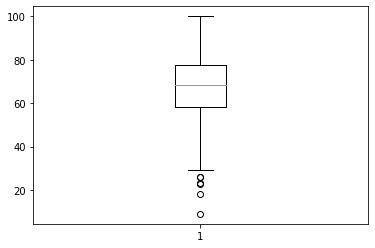

In [43]:

plt.boxplot(df.new_score_feature)

#yeni feature için hala aykırı değer olduğunu görüyoruz.
#aykırı değer olup olmadığını kontrol ediyorum. Daha önceki ödevlerde de vardı, ama tekrar bakmak istediğimde bulamadım.
#yeni feature olustururken, aykırı değerleri temizleyip mi oluşturmak daha uygundu ve bunu yapsak bile yine aykırı değer temizliğine kesinlikle ihtiyacımız olacakm mı?


(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <a list of 10 Patch objects>)

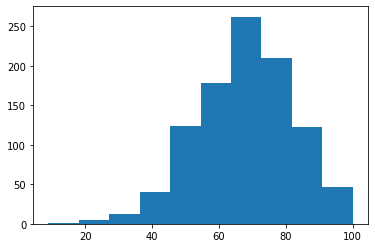

In [42]:
#yeni değişken ayrıca şu anda normal dağılımlı değil.


plt.hist(df.new_score_feature)

{'boxes': [<matplotlib.lines.Line2D at 0x7f6e539b42d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6e537c66d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6e53936310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6e53936c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6e539b4f10>,
  <matplotlib.lines.Line2D at 0x7f6e539b41d0>]}

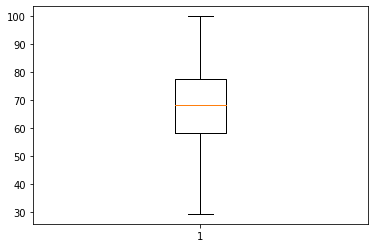

In [52]:
#yeni olusturduğumuz feature'a aşağı yönlü winsorize uyguluyoruz.

from scipy.stats.mstats import winsorize

winsorize_new_score_feature = winsorize(df.new_score_feature, (0.006,0))
df["winsorize_new_score_feature"] = winsorize_new_score_feature
plt.boxplot(df["winsorize_new_score_feature"])


In [55]:
#winsorize edilmiş new feature'u normalize edip dağılımı normal hale getirmeye calısıyoruz.

from sklearn.preprocessing import normalize

df["norm_winsorize_new_score_feature"] = normalize(np.array(df["winsorize_new_score_feature"]).reshape(1,-1)).reshape(-1,1)

(array([ 18.,  27.,  72., 120., 151., 209., 182., 119.,  72.,  30.]),
 array([0.01339121, 0.01661728, 0.01984334, 0.02306941, 0.02629547,
        0.02952154, 0.0327476 , 0.03597367, 0.03919973, 0.0424258 ,
        0.04565186]),
 <a list of 10 Patch objects>)

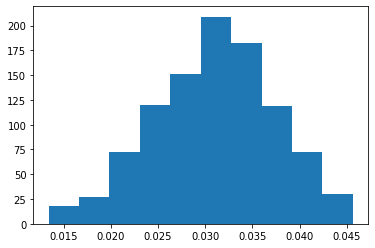

In [56]:
#normalize edilmiş yeni feature'ın grafiği.
plt.hist(df["norm_winsorize_new_score_feature"])

Text(0.5, 1.0, 'Korelasyon Matrisi ')

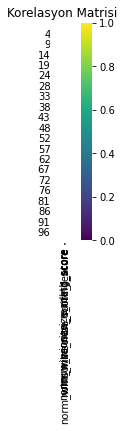

In [68]:
import seaborn as sns

#sadece karsılastırmak istediğim özelliklerden yeni bir dataframe olusturup, hangi özelliklerin birbiri ile
#ilişkili olduğunu heatmap ile korelasyonları karsılastırmak istedim. Ancak aşağıdaki gibi bir grafik verdi, hatanın nerede olduğunu bulamadım.

#bir sonraki satırda bütün dataframe'i kullanıp heatmap olusturmak zorunda kaldım, biraz daha karışık bir grafik oldu.



df_corr = df[["norm_winsorize_math_score","norm_winsorize_reading_score", "norm_winsorize_writing_score", "norm_winsorize_new_score_feature"]]


sns.heatmap(df_corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi ")

#

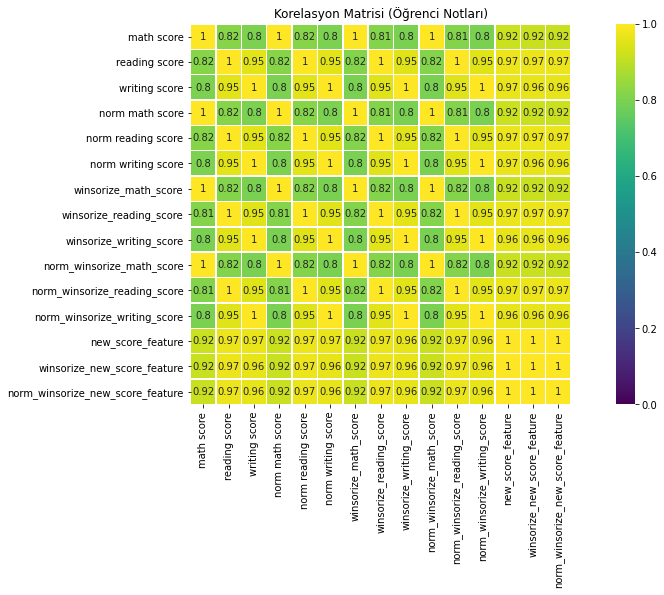

In [71]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)")
plt.show()

# Normalize edilmiş winsorize new_feature ile, normalize ve winsorize edilmiş 3 diğer özelliği karşılaştırıyoruz.
#Hedef değişken olan Normalize edilmiş winsorize new_feature ile en ilişkili özelliğin reading olduğunu görüyoruz.
#Bu yüzden veri ile ilerken math ve writing değişkenini veriden kaldırabiliriz.